## URI CSC 593 Programming for Scientists (Fall 2019)

### Final Project

#### Instruction
Your final project will require you to load your dataset, describe it, and ask and respond to a few questions that can be answered using it. You'll be submitting a single Jupyter notebook with the following sections:

## US Mortality Data in 2017

### Background

Mortality data from the [National Vital Statistics System (NVSS)](https://www.cdc.gov/nchs/nvss/deaths.htm) are a fundamental source of demographic, geographic, and cause-of-death information. This is one of the few sources of health-related data that are comparable for small geographic areas and are available for a long time period in the United States. The data are also used to present the characteristics of those dying in the United States, to determine life expectancy, and to compare mortality trends with other countries.

This analysis aims to find out the leading cause of death in 2017 according to the available documented demographic data. Variables that are relevant in this analysis including but not limited to:

|Demographic Variables|
|:---:|
|Resident Status|
|Race|
|Gender|
|Age Group|
|Marital Status|
|Education Level|

|Important Data Fields|
|:---:|
|Cause of Death|
|Manner of Death|

[Standard forms](https://www.cdc.gov/nchs//nvss/mortality_methods.htm#Standard%20forms) for the collection of the data and [model procedures](https://www.cdc.gov/nchs/products/misc_pubs.htm#modelstate) for the uniform registration of the events are developed and recommended for nationwide use through cooperative activities of the jurisdictions and NCHS. Material is available to assist persons in [completing the death certificate](https://www.cdc.gov/nchs/nvss/writing_cod_statements.htm). NCHS shares the costs incurred by the States in providing vital statistics data for national use. Software is available to automate coding of medical information on the death certificate, following World Health Organization rules specified in the International Classification of Diseases (ICD).

### Data Processing

Describe the process you used to load, clean, and prepare the data, and include the code you used to do so. You wrote this code during week 6 and possibly refined it in the following two weeks.

#### Directory and respective folder to access

- Raw data is located in ```../my_dataset/``` and given name as **US_2017MortalityData** and reference files that yet to be created will be saved in ```../my_dataset/ref_touse```

#### Steps

- Given that raw data is formatted in a fixed-width format where a single space represents a column, "Multiple_Cause_Record_Layout_2017.pdf" (can be found in ```../my_dataset/ref_touse```) is used closely in order to relate data that wanted to be included.

- Determine which data and tape location of the field in the fixed-width format data.

- Data selected are tabulated as below:

|Data Items|Tape Location|Data Type|
|:---|:---:|:---|
|Data Year|102 - 105|Numeric|
|Resident Status|20|Numeric|
|Place of Death and decedent's status|83|Numeric|
|Month of Death|65 - 66|Numeric|
|Sex|69|Numeric|
|Race|445 - 446|Numeric|
|Age|77 - 78|Numeric|
|Marital Status|84|Numeric|
|Education|63|Numeric|
|113 Cause Recode|154 - 156|Numeric|
|Manner of Death|107|Numeric|
|Autopsy|109|Numeric|

- New fields derivation and set a couple of data types explicitly:
  - race, resident status, gender, age group, marital status, education level, manner of death and cause of death
- For each data that is set explicitly, data cleaning includes merging data into groups, remove some of the low occurence data, and replace blank data with certain value.
- A brief summary and visualization for each data are included as well.
- For data items such as 113 Cause Recode, a reference file that contains cause of death can be created by copying from: [113 ICD-10 Recodes Table](https://www.resdac.org/sites/resdac.umn.edu/files/113%20ICD-10%20Recodes.txt) and save it into .csv file (in this directory: ```../my_dataset/ref_touse```)

In [1]:
#load necessary libraries
import numpy as np
import pandas as pd
import glob as g
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

%matplotlib notebook
#Graphics settings
%matplotlib inline
sns.set()


#read in raw data
m_data2017 = pd.read_fwf('../my_dataset/US_2017MortalityData', colspecs=((101,105),(19,20),(82,83),(64,66),(68,69),(444,446),(76,78),(83,84),(61,63),(153,156),(106,107),(108,109)), 
                  names=['Data Year', 'Resident Status', 'Place of Death', 'Month of Death', 'Sex', 'Race', 'Age', 'Marital Status', 'Education1', '113 Cause Recode', 'Manner of Death', 'Autopsy'])


m_data2017.head()

,Data Year,Resident Status,Place of Death,Month of Death,Sex,Race,Age,Marital Status,Education1,113 Cause Recode,Manner of Death,Autopsy
0,2017,1,1,1,M,8,7,S,9,114,NaN,U
1,2017,1,2,1,F,8,17,M,9,100,NaN,N
2,2017,1,1,1,F,8,26,W,9,48,NaN,N
3,2017,1,1,1,F,8,15,W,9,29,NaN,N
4,2017,1,1,1,F,8,14,M,9,46,NaN,N


In [2]:
#check data for some of the column to avoid any odd values
#and also to have an idea how to further clean it up and do grouping

m_data2017['Resident Status'].unique()
m_data2017['Place of Death'].unique()
m_data2017['Month of Death'].unique()
m_data2017['Sex'].unique()
m_data2017['Race'].unique() #remove races that are of low occurrence
m_data2017['Age'].unique()
m_data2017['Marital Status'].unique()
m_data2017['Education1'].unique()
m_data2017['113 Cause Recode'].unique()
m_data2017['Manner of Death'].unique()
m_data2017['Autopsy'].unique()

array(['U', 'N', 'Y'], dtype=object)

In [3]:
#check data structure
m_data2017.shape

(33315, 12)

### Race

In [4]:
#remove races that are of low occurrence
m_data2017_clean = m_data2017[(m_data2017['Race'] != 0) & (m_data2017['Race'] != 78) & (m_data2017['Race'] != 68)
                             & (m_data2017['Race'] != 8) & (m_data2017['Race'] != 6) & (m_data2017['Race'] != 3)] 

In [5]:
m_data2017_clean['Race'].unique()

array([ 1, 58,  4,  7,  5,  2, 28, 48])

In [6]:
#to create a derived field 
#1: White; 2: Black; 3: American Indian; 4: Chinese; 5: Japanese;
#7: Filipino; 28: Korean; 48: Vietnamese; 58: Guamanian
#create 9: Asian --> grouping chinese, japanese, korean, filipino, vietnamese

m_data2017_clean.loc[m_data2017_clean.Race == 4, 'Race'] = 9
m_data2017_clean.loc[m_data2017_clean.Race == 5, 'Race'] = 9
m_data2017_clean.loc[m_data2017_clean.Race == 7, 'Race'] = 9
m_data2017_clean.loc[m_data2017_clean.Race == 28, 'Race'] = 9
m_data2017_clean.loc[m_data2017_clean.Race == 48, 'Race'] = 9
bins = [0, 1, 2, 9, 58]
m_data2017_clean['Race2'] = pd.cut(m_data2017_clean['Race'], bins, 
                         labels=['White', 'Black', 'Asian', 'Guamanian'])

m_data2017_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Data Year,Resident Status,Place of Death,Month of Death,Sex,Race,Age,Marital Status,Education1,113 Cause Recode,Manner of Death,Autopsy,Race2
22,2017,1,3,1,M,1,20,D,9,86,NaN,N,White
29,2017,1,3,2,M,1,13,M,9,126,2.0,Y,White
37,2017,1,1,2,M,1,21,M,9,23,NaN,N,White
141,2017,1,3,6,M,1,19,M,9,56,NaN,Y,White
251,2017,1,3,10,M,1,18,M,9,120,NaN,Y,White


### Resident Status

In [7]:
m_data2017_clean['Resident Status'].unique()

array([1, 3, 4, 2])

In [8]:
#to create a derived field 
#1: Resident; 2: Intrastate Non-Resident (NR); 3: Interstate NR; 4: Foreign 
bins = [0, 1, 2, 3, 4]
m_data2017_clean['Residency'] = pd.cut(m_data2017_clean['Resident Status'], bins, 
                         labels=['Resident', 'Intrastate NR', 'Interstate NR', 'Foreign'])


m_data2017_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Data Year,Resident Status,Place of Death,Month of Death,Sex,Race,Age,Marital Status,Education1,113 Cause Recode,Manner of Death,Autopsy,Race2,Residency
22,2017,1,3,1,M,1,20,D,9,86,NaN,N,White,Resident
29,2017,1,3,2,M,1,13,M,9,126,2.0,Y,White,Resident
37,2017,1,1,2,M,1,21,M,9,23,NaN,N,White,Resident
141,2017,1,3,6,M,1,19,M,9,56,NaN,Y,White,Resident
251,2017,1,3,10,M,1,18,M,9,120,NaN,Y,White,Resident


### Age Group

In [9]:
m_data2017_clean['Age'].unique()

array([20, 13, 21, 19, 18, 16, 24, 22,  1, 17, 23, 25, 15, 12,  5, 14,  2,
        8, 10, 26, 11,  9,  7,  3,  6, 27,  4])

In [10]:
#to create a derived field for Age
#2: infant; 3-6: toddler; 7: < 10 yo; 8-9: < 20 yo; 10-11: < 30 yo; 12-13: < 40 yo;
#14-15: < 50 yo; 16-17: < 60 yo; 18-19: < 70 yo; 20-21: < 80 yo; 22-23: < 90 yo;
#24-25: < 100 yo; 26: > 100 yo

bins = [0, 2, 6, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26]
m_data2017_clean['Age_Group'] = pd.cut(m_data2017_clean['Age'], bins, 
                         labels=['infant', 'toddler', '5 - 9', '10 - 19', '20 - 29',
                                '30 - 39', '40 - 49', '50 - 59', '60 - 69',
                                '70 - 79', '80 - 89', '90 - 99', '100 and above'])
m_data2017_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Data Year,Resident Status,Place of Death,Month of Death,Sex,Race,Age,Marital Status,Education1,113 Cause Recode,Manner of Death,Autopsy,Race2,Residency,Age_Group
22,2017,1,3,1,M,1,20,D,9,86,NaN,N,White,Resident,70 - 79
29,2017,1,3,2,M,1,13,M,9,126,2.0,Y,White,Resident,30 - 39
37,2017,1,1,2,M,1,21,M,9,23,NaN,N,White,Resident,70 - 79
141,2017,1,3,6,M,1,19,M,9,56,NaN,Y,White,Resident,60 - 69
251,2017,1,3,10,M,1,18,M,9,120,NaN,Y,White,Resident,60 - 69


In [11]:
m_data2017_clean['Age_Group'].unique()

[70 - 79, 30 - 39, 60 - 69, 50 - 59, 90 - 99, ..., 10 - 19, 20 - 29, 100 and above, 5 - 9, NaN]
Length: 14
Categories (13, object): [infant < toddler < 5 - 9 < 10 - 19 ... 70 - 79 < 80 - 89 < 90 - 99 < 100 and above]

### Marital Status

In [12]:
m_data2017_clean['Marital Status'].unique()

array(['D', 'M', 'W', 'S', 'U'], dtype=object)

In [13]:
#to create a derived field for Marital Status
#S: Single; M: Married; W: Widowed; D: Divorced; U: Unknown
#change data type from character to numeric

m_data2017_clean.loc[m_data2017_clean['Marital Status'] == 'S', 'Marital Status'] = 1
m_data2017_clean.loc[m_data2017_clean['Marital Status'] == 'M', 'Marital Status'] = 2
m_data2017_clean.loc[m_data2017_clean['Marital Status'] == 'W', 'Marital Status'] = 3
m_data2017_clean.loc[m_data2017_clean['Marital Status'] == 'D', 'Marital Status'] = 4
m_data2017_clean.loc[m_data2017_clean['Marital Status'] == 'U', 'Marital Status'] = 5

bins = [0, 1, 2, 3, 4, 5]
m_data2017_clean['Marital_Status'] = pd.cut(m_data2017_clean['Marital Status'], bins, 
                         labels=['Single', 'Married', 'Widowed', 'Divorced', 'Unknown'])


m_data2017_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Data Year,Resident Status,Place of Death,Month of Death,Sex,Race,Age,Marital Status,Education1,113 Cause Recode,Manner of Death,Autopsy,Race2,Residency,Age_Group,Marital_Status
22,2017,1,3,1,M,1,20,4,9,86,NaN,N,White,Resident,70 - 79,Divorced
29,2017,1,3,2,M,1,13,2,9,126,2.0,Y,White,Resident,30 - 39,Married
37,2017,1,1,2,M,1,21,2,9,23,NaN,N,White,Resident,70 - 79,Married
141,2017,1,3,6,M,1,19,2,9,56,NaN,Y,White,Resident,60 - 69,Married
251,2017,1,3,10,M,1,18,2,9,120,NaN,Y,White,Resident,60 - 69,Married


### Education Level

In [14]:
m_data2017_clean['Education1'].unique()

array([9, 3, 2, 1, 6, 4, 5, 8, 7, 0])

In [15]:
#to create a derived field for education level
#1: 8th grade or less; 2: no diploma; 3: high school graduate; 4: college credit;
#5: associate degree; 6: bachelor's degree; 7: master's degree; 8: PhD;
#9: unknown; 10: no formal education

m_data2017_clean.loc[m_data2017_clean['Education1'] == 0, 'Education1'] = 10

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
m_data2017_clean['Education_Level'] = pd.cut(m_data2017_clean['Education1'], bins, 
                         labels=['8th grade or less', 'No diploma', 'High school graduate', 
                                 'College credit', 'Associate degree', "Bachelor's degree", "Master's degree",
                                "PhD", "Unknown", "No formal education"])

m_data2017_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Data Year,Resident Status,Place of Death,Month of Death,Sex,Race,Age,Marital Status,Education1,113 Cause Recode,Manner of Death,Autopsy,Race2,Residency,Age_Group,Marital_Status,Education_Level
22,2017,1,3,1,M,1,20,4,9,86,NaN,N,White,Resident,70 - 79,Divorced,Unknown
29,2017,1,3,2,M,1,13,2,9,126,2.0,Y,White,Resident,30 - 39,Married,Unknown
37,2017,1,1,2,M,1,21,2,9,23,NaN,N,White,Resident,70 - 79,Married,Unknown
141,2017,1,3,6,M,1,19,2,9,56,NaN,Y,White,Resident,60 - 69,Married,Unknown
251,2017,1,3,10,M,1,18,2,9,120,NaN,Y,White,Resident,60 - 69,Married,Unknown


### Manner of Death

In [16]:
m_data2017_clean['Manner of Death'].unique()

array([nan,  2.,  7.,  3.,  1.,  5.,  4.])

In [17]:
#to create a derived field for Manner of Death
#1: Accident; 2: Suicide; 3: Homicide; 4: Pending investigation; 5: Could not determine;
#6: Self-inflicted; 7: Natural; 
#addtional for NAN --> 8: Not specified

m_data2017_clean["Manner of Death"].fillna(8, inplace = True)

bins = [0, 1, 2, 3, 4, 5, 7, 8]
m_data2017_clean['Death_Manner'] = pd.cut(m_data2017_clean['Manner of Death'], bins, 
                         labels=['Accident', 'Suicide', 'Homicide', 'Pending investigation', 'Could not determine', 
                                 'Natural', 'Not specified'])

m_data2017_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Data Year,Resident Status,Place of Death,Month of Death,Sex,Race,Age,Marital Status,Education1,113 Cause Recode,Manner of Death,Autopsy,Race2,Residency,Age_Group,Marital_Status,Education_Level,Death_Manner
22,2017,1,3,1,M,1,20,4,9,86,8.0,N,White,Resident,70 - 79,Divorced,Unknown,Not specified
29,2017,1,3,2,M,1,13,2,9,126,2.0,Y,White,Resident,30 - 39,Married,Unknown,Suicide
37,2017,1,1,2,M,1,21,2,9,23,8.0,N,White,Resident,70 - 79,Married,Unknown,Not specified
141,2017,1,3,6,M,1,19,2,9,56,8.0,Y,White,Resident,60 - 69,Married,Unknown,Not specified
251,2017,1,3,10,M,1,18,2,9,120,8.0,Y,White,Resident,60 - 69,Married,Unknown,Not specified


### Cause of Death (using 113 cause recode)

In [18]:
#read in additional info files

#create loop to read in files with the same extension

ref_files_list = sorted(g.glob('../my_dataset/ref_touse/*.csv'))

ref_name = ["resident_status", "injury_at_work", "method_of_disposition", "autopsy", "place_of_death", 
            "month_of_death", "race_info", "age_info", "marital_status", "education_info1", 
            "cause_code_113", "place_of_injury"]


for f in range(len(ref_files_list)):
        data_temp = pd.read_csv(ref_files_list[f])
        ref_name[f] = data_temp

In [19]:
ref_name[5]

#to check how many files
len(ref_files_list)

#only use 113 code file as other columns have been processed (above)
ref_name[10]

,113 Cause Recode,113_Desc
0,1,Salmonella infections
1,2,Shigellosis and amebiasis
2,3,Certain other intestinal infections
3,4,Tuberculosis
4,5,Respiratory tuberculosis
...,...,...
130,131,Events of undetermined intent
131,132,"Discharge of firearms, undetermined intent"
132,133,Unspecified events of undetermined intent
133,134,Operations of war and their sequelae


In [20]:
#merge reference file and save it as a new variable
m_data2017_touse = pd.merge(m_data2017_clean, ref_name[10],  on=['113 Cause Recode'])

### Analysis

List three questions that can be answered using your data. For each question, provide:
- At least one relevant visualization;
- A brief explanation of the question; and
- A relevant table, summary statistics, and/or the output of a statistical model.

### Question 1: How are the decedent's demographic distribution like in 2017?

In [69]:
m_data2017_touse.shape

(32681, 19)

In [78]:
#sort by gender
m_data2017_touse.groupby(m_data2017_clean.Sex).size()

Sex
F    14561
M    17489
dtype: int64

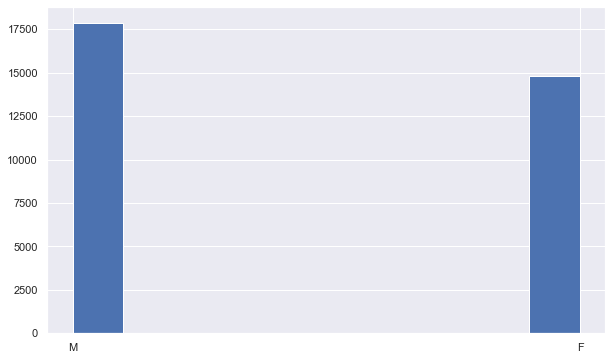

In [70]:
#sort by gender
m_data2017_touse.groupby(m_data2017_clean.Sex).size()

#plot histogram of gender
fig, ax = plt.subplots(figsize=(10,6))
plt.hist('Sex', data = m_data2017_touse)
plt.show()

In [21]:
#Race2 overview
m_data2017_touse.groupby(m_data2017_clean.Race2).size()

Race2
White        29189
Black         1936
Asian          274
Guamanian      651
dtype: int64

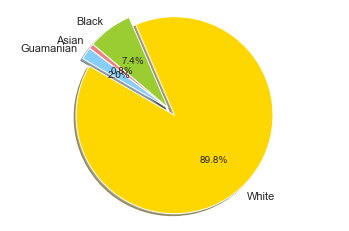

In [22]:
# Data to plot
labels = 'White', 'Black', 'Asian', 'Guamanian'
sizes = [29345, 2411, 274, 651]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 150)

plt.axis('equal')
plt.show()

In [23]:
#Residency overview
m_data2017_touse.groupby(m_data2017_clean.Residency).size()

Residency
Resident         20281
Intrastate NR    11462
Interstate NR       33
Foreign            274
dtype: int64

In [25]:
#Age group overview
m_data2017_clean.groupby(m_data2017_touse.Age_Group).size()

Age_Group
infant            197
toddler            27
5 - 9              21
10 - 19           130
20 - 29           664
30 - 39           804
40 - 49          1339
50 - 59          2810
60 - 69          4861
70 - 79          7428
80 - 89          8676
90 - 99          4672
100 and above     410
dtype: int64

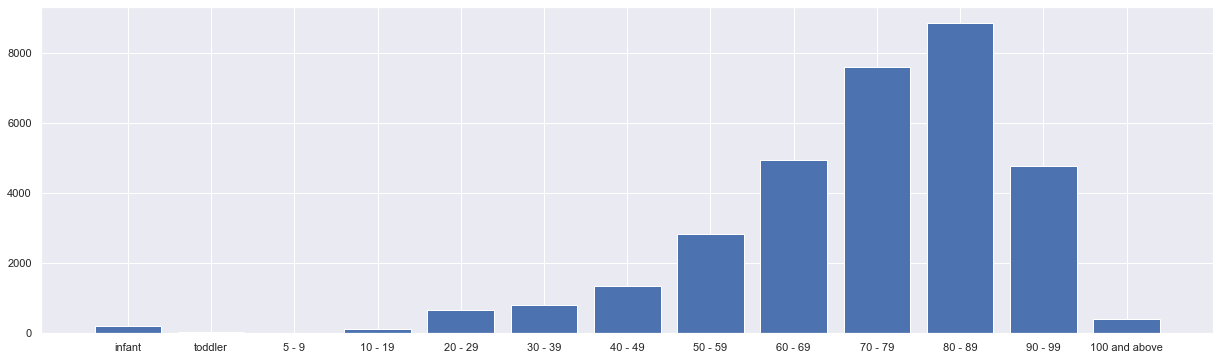

In [26]:
#plot histogram of age group
fig, ax = plt.subplots(figsize=(21,6))

agegroup = ['infant', 'toddler', '5 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', 
          '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '100 and above']
count = ['198', '27', '21', '133', '675', '814', '1364', '2840', '4949', '7593', '8864', '4787', '415']

plt.bar(range(len(agegroup)), list(map(float,count)) )
plt.xticks(range(len(agegroup)), agegroup)
plt.show()

In [27]:
#Marital status overview
m_data2017_touse.groupby(m_data2017_touse.Marital_Status).size()

Marital_Status
Single       6871
Married     10943
Widowed      9675
Divorced     4636
Unknown       556
dtype: int64

In [28]:
#Education level overview
m_data2017_touse.groupby(m_data2017_touse.Education_Level).size()

Education_Level
8th grade or less       12506
No diploma               4715
High school graduate     6845
College credit           1355
Associate degree         2044
Bachelor's degree        2883
Master's degree           775
PhD                       344
Unknown                  1192
No formal education        22
dtype: int64

In [66]:
#calculate distribtuion of resident status and race (distribution by resident status)
residencybyrace = m_data2017_touse.groupby(['Residency', 'Race2']).size() #size() #or .mean()
residencybyrace.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Distribution (%)').sort_values('Distribution (%)', ascending = False)

,Residency,Race2,Distribution (%)
4,Intrastate NR,White,94.133543
0,Resident,White,87.687371
10,Foreign,White,76.190476
7,Interstate NR,Black,38.235294
6,Interstate NR,White,35.294118
9,Interstate NR,Guamanian,20.588235
11,Foreign,Black,18.707483
1,Resident,Black,7.997701
8,Interstate NR,Asian,5.882353
5,Intrastate NR,Black,5.866457


In [65]:
#more summary statistics
#calculate distribtuion of sex and age group
genderbyage = m_data2017_touse.groupby(['Sex', 'Age_Group']).size()
genderbyage.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Distribution (%)').sort_values('Distribution (%)', ascending = False)

,Sex,Age_Group,Distribution (%)
10,F,80 - 89,31.702041
22,M,70 - 79,24.401432
23,M,80 - 89,23.293802
9,F,70 - 79,21.839935
11,F,90 - 99,20.163580
21,M,60 - 69,17.699709
8,F,60 - 69,12.065702
20,M,50 - 59,10.572835
24,M,90 - 99,10.091743
7,F,50 - 59,6.421522


#### Brief explanation - Question 1 in summary

Demographic variables include decedent's resident status, race, gender, age group, marital status and education level. In 2017, there are a total of **32681 death records**. 

- Gender distribution is almost equal that **14561 (~45%)** records are female and **17489 (~54%)** are male. 631 death records with no gender information.


- The races are categorized into four major etnicity groups, with caucasians account the majority (89.8%) and asians are the minority (0.8%).



- There are **20281 records** show decedents' State and County of Occurrence and Residence are the same. **11462 records** show intrastate non-residents with State of Occurrence and Residence are the same, but County is different. **33 records** show interstate non-residents where State of Occurrence and Residence are different, but both are in the U.S. **274 records** show foreign residents.


- In general, decedents are of age between **80 - 89 (the most)**, followed by 70 - 79, 60 - 69 and 90 - 99. Age group between 5 - 9 has the least records. The distribution of age group seems reasonable.


- Most of the decedents records show they are married, and with regards to education level, most of the records are 8th grade or less (12506 records), 1192 unknown and 22 records show no formal education.


- Distribution by gender with consideration of different age group shows that **female has greater longevity** (approx. 32% of the records fall under 80 - 89 age group, approx. 20% falls under 90 - 99 age group) than male (~23% fall under 80 - 89 age group, ~10% falls under 90 - 99 age group). 

### Question 2: What are the top causes of death in the US 2017?

In [125]:
#given there are 100+ of causes, simplifying to top 20 to find out top causes of death in the US 2017
cause = m_data2017_touse.groupby(m_data2017_touse['113_Desc']).size().to_frame('Count')
cause_sorted = cause.sort_values('Count', ascending = False)
cause_sorted.head(20)

,Count
113_Desc,
All other diseases,3670
Diabetes mellitus,3323
Alzheimer's disease,2385
All other forms of chronic ischemic heart disease,2166
Acute myocardial infarction,1539
Cerebrovascular diseases,1321
All other and unspecified malignant neoplasms,959
Other chronic lower respiratory diseases,937
Renal failure,927


#### Brief explanation - Question 2 Table 1

Table 1 above shows top 20 causes of death in the US in 2017. 

_Note: The description of all other diseases is vague, hence, it is disregarded although it has the highest records._

- **Diabetes** is the number one killer in 2017, followed by **Alzheimer's disease**, **chronic heart disease**, **heart attack (Acute myocardial infarction)**, and **stroke (Cerebrovascular diseases)**.


- People also died from assault as it is among the top 20 causes.



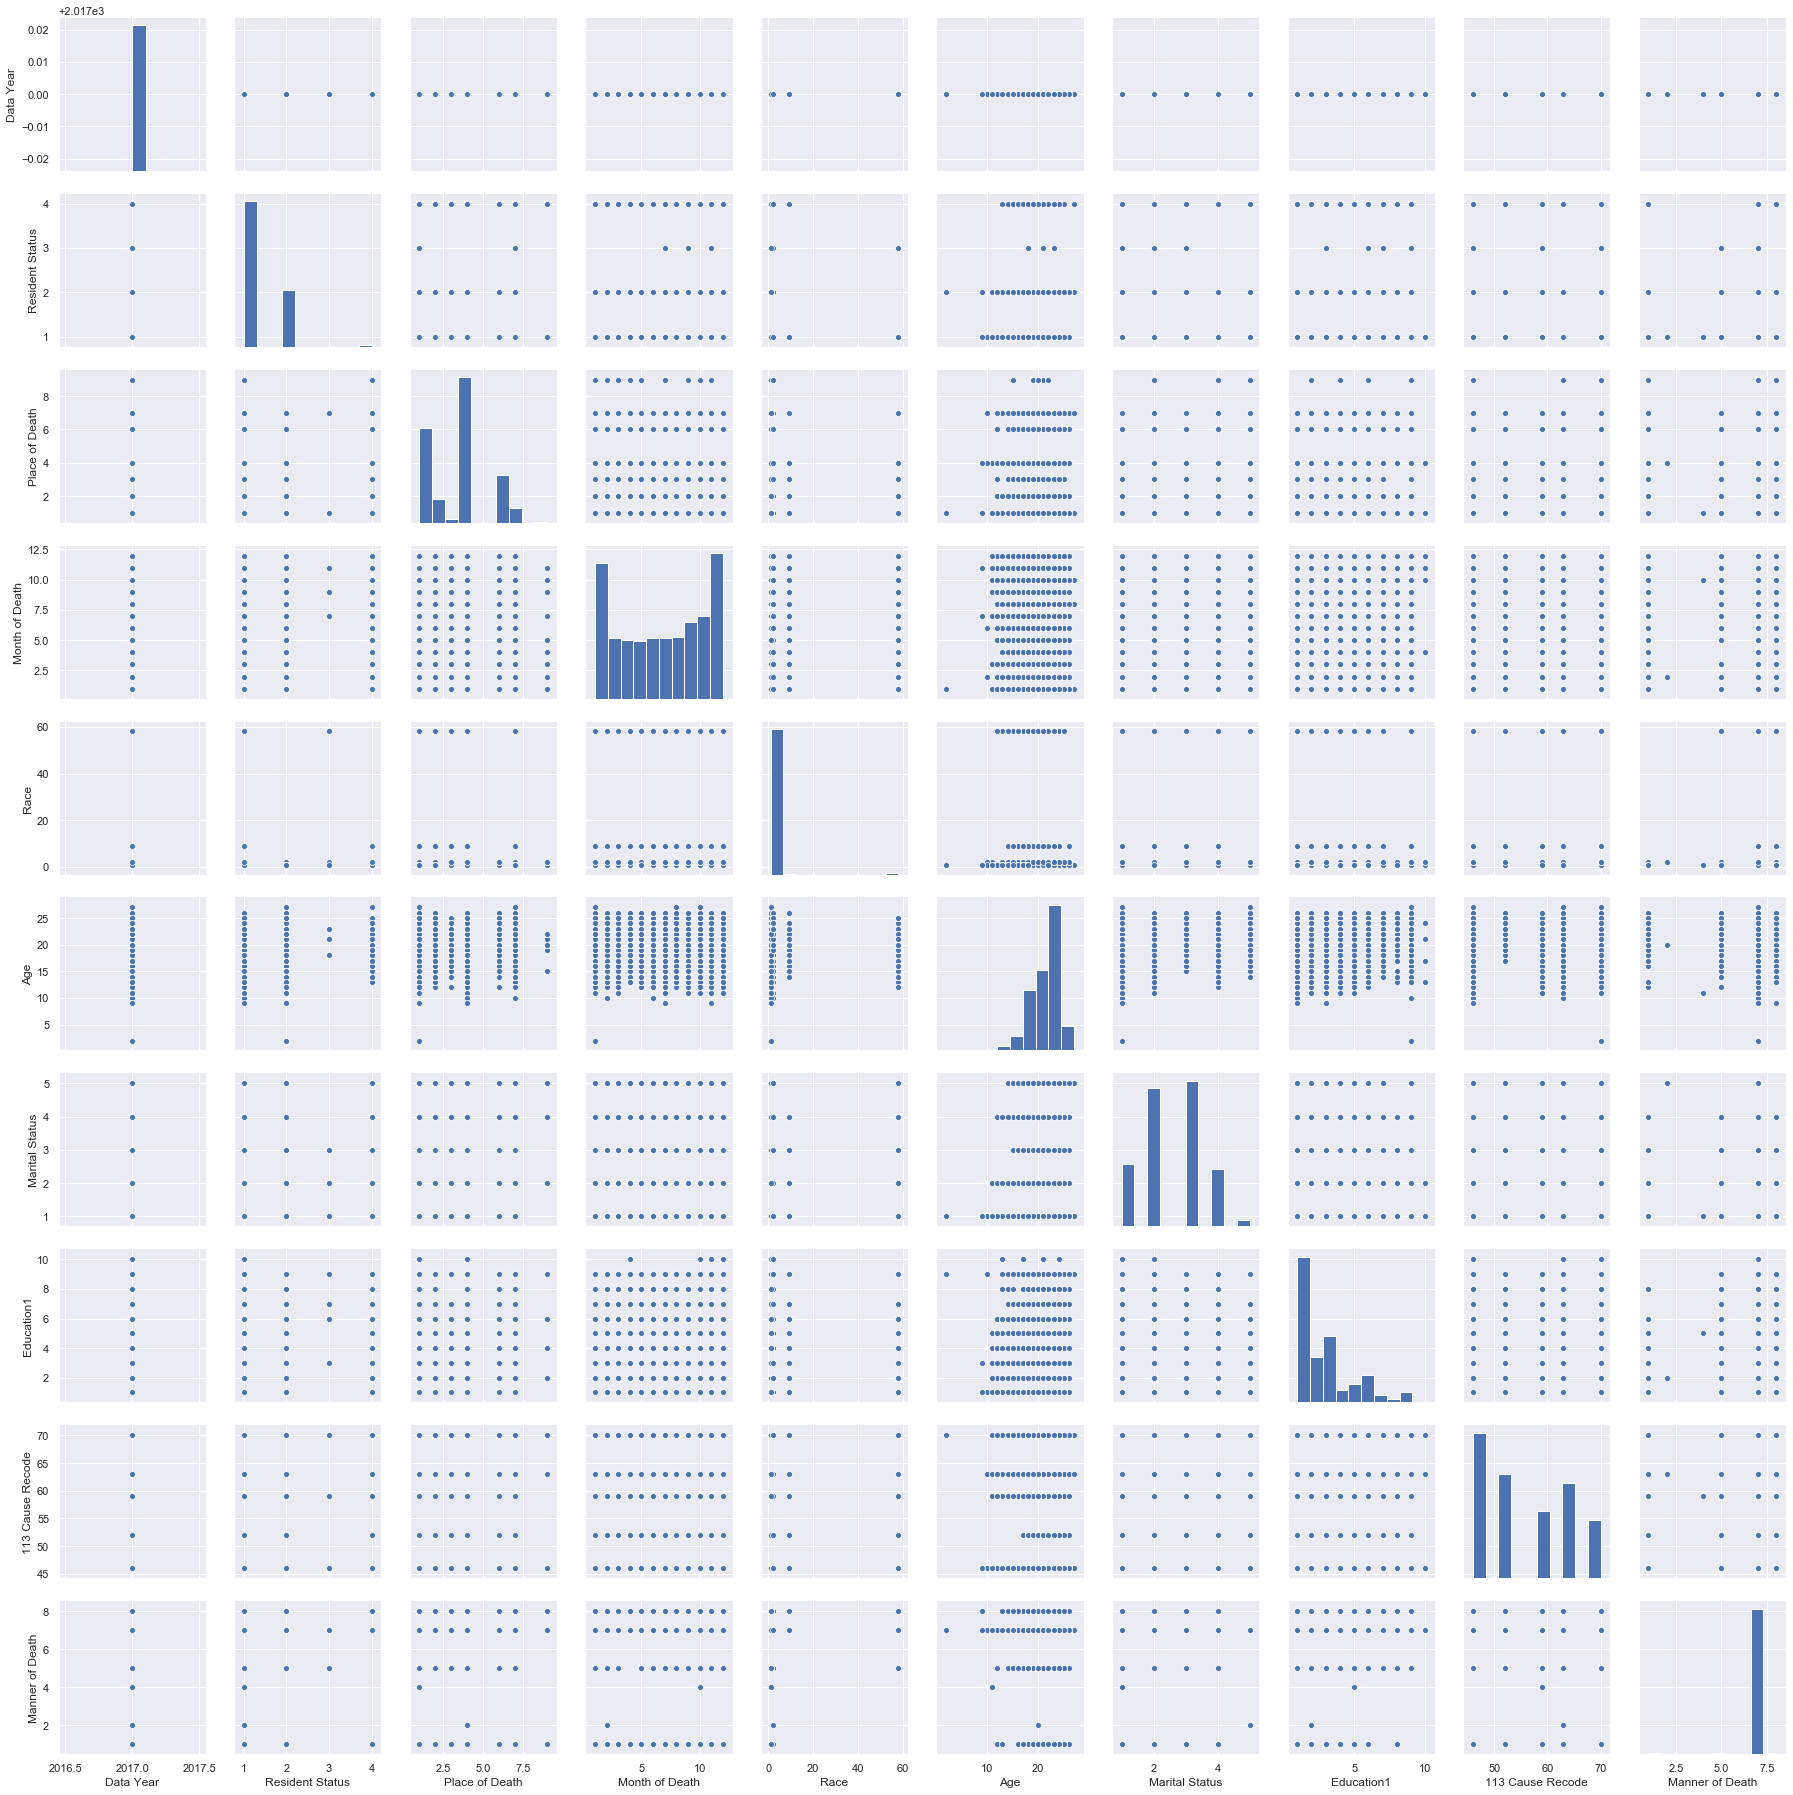

In [206]:
#find out correlation of top causes and age group
subsetdf = m_data2017_touse[m_data2017_touse['113 Cause Recode'].isin([46, 52, 63, 59, 70]) ]
subsetdf

sns.pairplot(subsetdf)
plt.show()

#### Brief explanation - Question 2 Figure 1

Figure 1 above shows pair plots of top death causes subset.

- Given that the mortality data are all in categorical forms, hence, it's not possible to draw correlations between factors.

### Question 3: What are the manner of death and how some of the manner of death relates to other demogrphic factors?

In [131]:
#Death manner overview
m_data2017_touse.groupby(m_data2017_touse.Death_Manner).size()

Death_Manner
Accident                  1054
Suicide                    293
Homicide                   748
Pending investigation      825
Could not determine        494
Natural                  28889
Not specified              378
dtype: int64

#### Brief explanation - Question 3 Table 1

Table 2 above shows manner of death in the US in 2017. 

- People died mostly due to natural cause which inline with the result from Table 1 as the top killers are mostly about diseases.


- Accident is the second top occurrence in 2017, followed by death that are pending investigation and **homicide**, which account for a total of 748 records.


- From Table 1, homicide factor seems interesting and will explore more on this variable next.

In [167]:
#more about homicide data
homicide_data = m_data2017_touse[m_data2017_touse.Death_Manner == "Homicide"]
table3 = homicide_data.groupby(['Sex', 'Age_Group', 'Residency']).size().to_frame('Count')
table3.sort_values('Count', ascending = False)

Count
Sex Age_Group Residency           
M   20 - 29   Resident         192
    30 - 39   Resident         126
    20 - 29   Intrastate NR    123
    40 - 49   Resident          62
    30 - 39   Intrastate NR     58
    10 - 19   Resident          26
    50 - 59   Resident          26
    40 - 49   Intrastate NR     23
    10 - 19   Intrastate NR     21
    60 - 69   Resident          15
    50 - 59   Intrastate NR     10
F   20 - 29   Resident           9
M   70 - 79   Resident           7
F   50 - 59   Resident           5
    20 - 29   Intrastate NR      5
    10 - 19   Resident           4
    30 - 39   Resident           4
M   40 - 49   Foreign            3
    60 - 69   Intrastate NR      3
F   40 - 49   Resident           3
M   30 - 39   Foreign            2
    5 - 9     Resident           2
    20 - 29   Foreign            2
F   30 - 39   Intrastate NR      2
    70 - 79   Intrastate NR      2
    50 - 59   Intrastate NR      2
M   70 - 79   Intrastate NR      1
    80 - 89   Resident           1
F   5 - 9     Resident           1
M   20 - 29   Interstate NR      1
    toddler   Resident           1
F   80 - 89   Resident           1
    60 - 69   Resident           1
    40 - 49   Intrastate NR      1
M   90 - 99   Intrastate NR      1

#### Brief explanation - Question 3 Table 2

Table 3 above shows homicide data grouped by gender and resident status.

- **Male** has the highest occurence of various age group (ranging from 10 to 69 years old) and they are either resident or intrastate NR.

### Question 4: What is the trend of death causes when grouped by gender and age group?

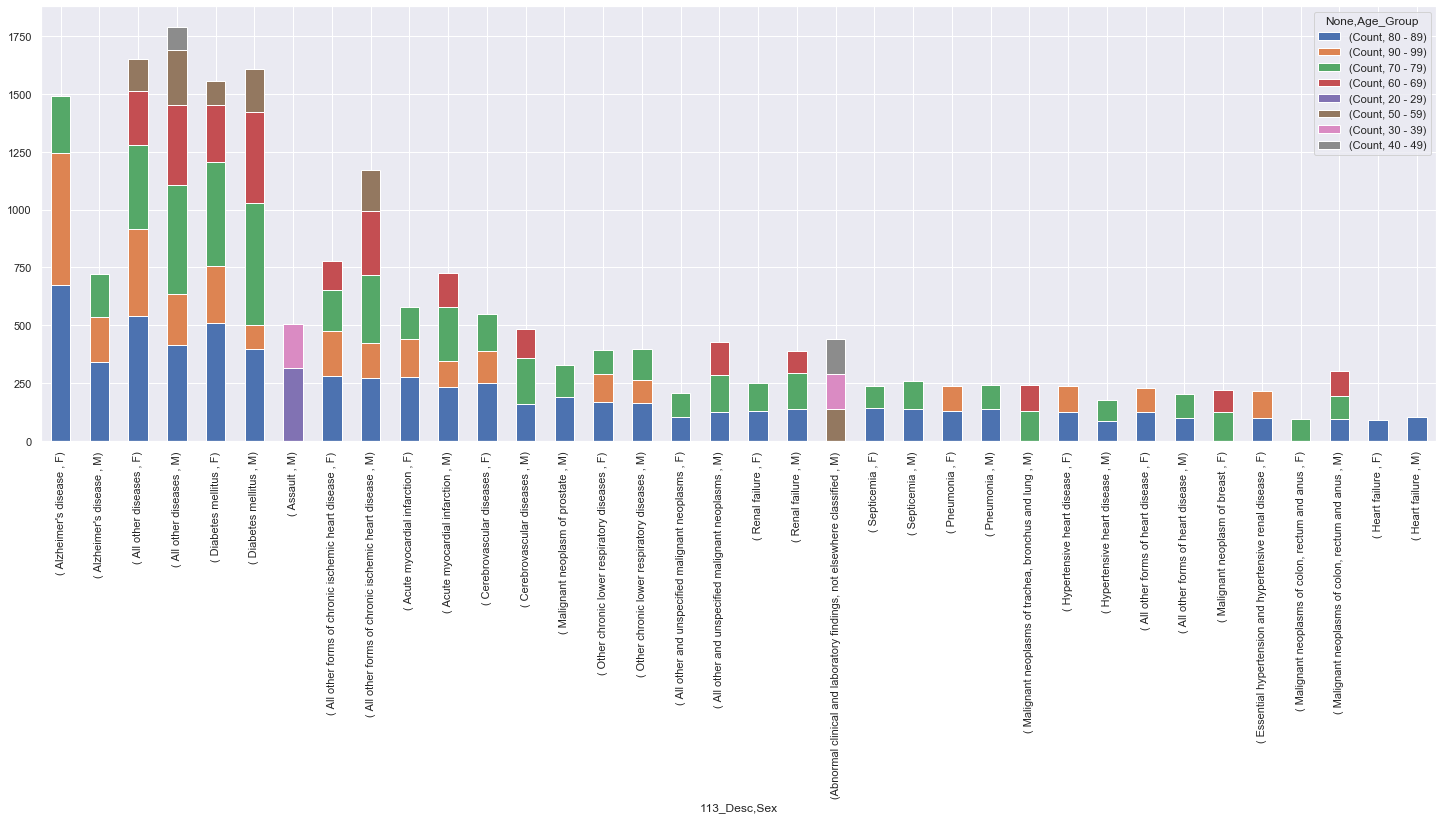

In [207]:
#groupby cause, gender and age group and sort in descending order then take the top 100
#plot as a stacked bar chart

cause1 = m_data2017_touse.groupby(['113_Desc', 'Sex', 'Age_Group']).size().to_frame('Count')
cause1_sorted = cause1.sort_values('Count', ascending = False)
top = cause1_sorted.head(100)

top.unstack().plot(kind='bar', stacked=True, figsize=(25,8))
#plt.rcParams['font.size']=12 #coudn't get font size to change
plt.show()

#### Brief explanation - Question 4 Figure 1

Figure 1 above shows stacked bar chart of cause of death grouped by gender and age group.

_Note: The description of all other diseases is vague, hence, it is disregarded although it has the highest records._

- The stacked bar plot shows decedents were mainly from 80 - 89 age group.


- **Male** has higher death records due to **diabetes** than female, and the youngest age group starts from **50 - 59 years old** for both gender.


- **Female** has higher death records due to **Alzheimer's disease** than male, and both gender has death records from the age group **70 - 79 years old**.


- **Male** has higher death records due to **chronic heart diseases** than female, however, male has a younger age group (50 - 59 years old).


- **Young male**, from 20 - 29 and 30 - 39 age groups, died mostly from **assault**. 


- **Middle age males (30 - 59 age groups)** died from **abnormal clinical or laboratory findings**. 